In [1]:
import scipy as sp
import numpy as np

In [2]:
rate = 44100
len = 10 #longitud en segundos
X = np.linspace(0, len, len * rate)
data = 0.5 * np.sin(X * 240 * (2 * np.pi))
sp.io.wavfile.write("test.wav", rate, data)

Primero obtengamos un objeto de bytes para el ejemplo

In [3]:
with open("testing.txt", 'rb') as f:
    bytes = f.read()

In [4]:
bytes

b'hola, esto es una prueba de escritura. Aqu\xc3\xad hay una tilde'

In [5]:
for i in bytes[:10]:
    print(i)

104
111
108
97
44
32
101
115
116
111


Entonces queremos escribir esos bytes con la codificación de kcs. Para organizar mejor, primero transformemos cada byte en una lista de booleanos en little endian.

In [6]:
bin(bytes[0])

'0b1101000'

In [7]:
bytelistLE = []
for i in bytes:
    # i es un número entre 0 y 255
    binario = []
    div = i
    for i in range(8):
        rem = div % 2
        div = div // 2
        binario.append(rem)
    bytelistLE.append(binario)
    

In [8]:
bytelistLE[:4]

[[0, 0, 0, 1, 0, 1, 1, 0],
 [1, 1, 1, 1, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 1, 1, 0],
 [1, 0, 0, 0, 0, 1, 1, 0]]

Ahora que tenemos la lista, podemos codificar los bytes como dice el estandar.

In [9]:
tiempo = 1/300 # la duración de cada bit en segundos
frec1 = 2400
frec0 = 1200 # frecuencias de 1 y 0
tails = 4 # tiempo antes de empezar la transmisión

Ltime = np.linspace(0, tiempo, round(rate*tiempo))
tailsSec = np.linspace(0, tails, rate * tails)
tailWave = 0.8 * np.sin(frec1 * (2 * np.pi) * tailsSec)
Wve1 = 0.8 * np.sin(frec1 * (2 * np.pi) * Ltime)
Wve0 = 0.8 * np.sin(frec0 * (2 * np.pi) * Ltime)

DataWave = np.array([])

DataWave = np.concatenate((DataWave, tailWave))

for bait in bytelistLE:
    for bit in bait:
        DataWave = np.concatenate((DataWave, Wve0))# start bit
        if bit == 0:
            DataWave = np.concatenate((DataWave, Wve0)) # datos
        if bit == 1:
            DataWave = np.concatenate((DataWave, Wve1))
        DataWave = np.concatenate((DataWave, Wve1))
        DataWave = np.concatenate((DataWave, Wve1))
        DataWave = np.concatenate((DataWave, Wve1)) # stop bits
    DataWave = np.concatenate((DataWave, Wve1))
DataWave
DataWave = np.concatenate((DataWave, tailWave))


In [10]:
sp.io.wavfile.write("out.wav", rate, DataWave)

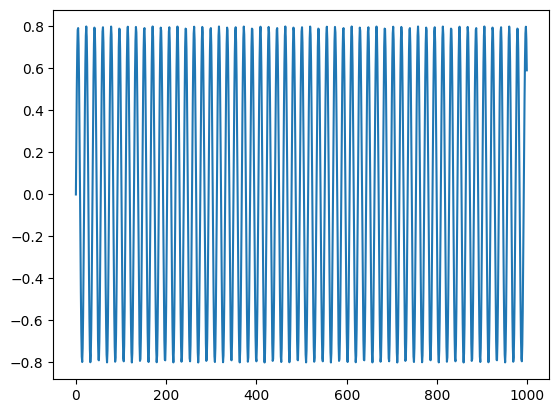

In [11]:
import matplotlib.pyplot as plt
plt.plot(DataWave[:1000])